In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from statsmodels.formula.api import ols

### EDA Exploratroy data analysis

In [2]:
# load orders csv
orders = pd.read_csv('olist_public_dataset_v2.csv')
orders.head()

,order_id,order_status,order_products_value,order_freight_value,order_items_qty,order_sellers_qty,order_purchase_timestamp,order_aproved_at,order_estimated_delivery_date,order_delivered_customer_date,...,product_name_lenght,product_description_lenght,product_photos_qty,product_id,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,b95df3cef5297e79ef709ba256518f6f,delivered,349.90,13.84,1,1,2017-01-31 17:19:01.000000,2017-02-01 02:41:21.549551,2017-03-15 00:00:00.000000,2017-02-06 11:04:24.154259,...,51,625,1,6cdd53843498f92890544667809f1595,b95df3cef5297e79ef709ba256518f6f,5,NaN,NaN,2017-02-07 00:00:00.000000,2017-02-09 02:37:37+00:00
1,59af46052a799e80e2f0c665c587731d,delivered,15.00,15.10,1,1,2017-09-09 19:52:54.000000,2017-09-10 20:03:31.535281,2017-10-02 00:00:00.000000,2017-09-13 20:17:41.296915,...,44,1428,2,ae5cad88462eb7b7b61401e31c45618e,59af46052a799e80e2f0c665c587731d,5,NaN,entrega em 2 dias produto c boa qualidade otim...,2017-09-14 00:00:00.000000,2017-09-15 03:43:47+00:00
2,a3e6136894621db402a772c6bc72a12a,delivered,238.90,18.00,1,1,2017-01-30 17:00:09.000000,2017-01-30 17:31:25.438253,2017-03-07 00:00:00.000000,2017-02-06 15:43:04.758566,...,55,637,1,0c9ff9d8ed9b9bdd825487b3a66e05f5,a3e6136894621db402a772c6bc72a12a,5,NaN,produto veio antes do prazo informado muito ob...,2017-02-07 00:00:00.000000,2017-02-10 14:18:53+00:00
3,b675ea5a618922f6e679e30531b8957b,delivered,29.99,18.23,1,1,2018-03-11 18:18:36.000000,2018-03-11 18:30:37.931962,2018-04-03 00:00:00.000000,2018-04-03 20:36:43.778451,...,55,617,1,ad0a798e7941f3a5a2fb8139cb62ad78,b675ea5a618922f6e679e30531b8957b,4,NaN,NaN,2018-04-04 00:00:00.000000,2018-04-05 02:52:31+00:00
4,195a8be6794c487fe6cfbb97b7c61902,delivered,295.99,47.65,1,1,2017-04-20 08:01:08.000000,2017-04-25 08:05:40.405383,2017-05-24 00:00:00.000000,2017-05-04 18:47:45.721758,...,49,558,2,eaf2046d4c87809247a30050ea13df03,195a8be6794c487fe6cfbb97b7c61902,5,NaN,NaN,2017-05-05 00:00:00.000000,2017-05-08 15:20:18+00:00


In [4]:
# check data type
orders.dtypes

order_id                          object
order_status                      object
order_products_value             float64
order_freight_value              float64
order_items_qty                    int64
order_sellers_qty                  int64
order_purchase_timestamp          object
order_aproved_at                  object
order_estimated_delivery_date     object
order_delivered_customer_date     object
customer_id                       object
customer_city                     object
customer_state                    object
customer_zip_code_prefix           int64
product_category_name             object
product_name_lenght                int64
product_description_lenght         int64
product_photos_qty                 int64
product_id                        object
review_id                         object
review_score                       int64
review_comment_title              object
review_comment_message            object
review_creation_date              object
review_answer_ti

In [5]:
# change datatype
orders['order_purchase_timestamp'] = pd.to_datetime(orders.order_purchase_timestamp)
orders['order_aproved_at'] = pd.to_datetime(orders.order_aproved_at).dt.date  
orders['order_estimated_delivery_date'] = pd.to_datetime(orders.order_estimated_delivery_date).dt.date  
orders['order_delivered_customer_date'] = pd.to_datetime(orders.order_delivered_customer_date).dt.date 

In [8]:
# load translation dataset and merge with orders
translation = pd.read_csv('product_category_name_translation.csv')
orders = orders.merge(translation, on='product_category_name')
orders.head()

,order_id,order_status,order_products_value,order_freight_value,order_items_qty,order_sellers_qty,order_purchase_timestamp,order_aproved_at,order_estimated_delivery_date,order_delivered_customer_date,...,product_description_lenght,product_photos_qty,product_id,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,product_category_name_english
0,b95df3cef5297e79ef709ba256518f6f,delivered,349.90,13.84,1,1,2017-01-31 17:19:01,2017-02-01,2017-03-15,2017-02-06,...,625,1,6cdd53843498f92890544667809f1595,b95df3cef5297e79ef709ba256518f6f,5,NaN,NaN,2017-02-07 00:00:00.000000,2017-02-09 02:37:37+00:00,health_beauty
1,e98077a0d199a25a40eab3b14cc230d4,delivered,39.99,15.23,1,2,2018-04-17 13:25:36,2018-04-18,2018-05-10,2018-04-27,...,405,2,190d9562bfbe9d3ed876c2ac6f2f5894,e98077a0d199a25a40eab3b14cc230d4,5,NaN,NaN,2018-04-28 00:00:00.000000,2018-04-29 21:07:53+00:00,health_beauty
2,8a723730400b508cbf47fbef4a76ec8e,delivered,60.00,20.91,1,1,2018-02-18 12:41:01,2018-02-18,2018-03-14,2018-03-03,...,1665,1,5858f45c20fde7d7e49af37a2166635a,8a723730400b508cbf47fbef4a76ec8e,5,NaN,muito bom cabelo fica lisinho,2018-03-04 00:00:00.000000,2018-03-07 02:53:50+00:00,health_beauty
3,cf71b9b6b7ed12d72f541b0420023f19,delivered,79.99,10.94,1,1,2018-05-09 23:33:28,2018-05-11,2018-05-24,2018-05-17,...,492,3,2b4609f8948be18874494203496bc318,cf71b9b6b7ed12d72f541b0420023f19,4,Bom,gostei,2018-05-18 00:00:00.000000,2018-05-20 19:47:57+00:00,health_beauty
4,93ef9253c47e7dfc633c01f728488cb1,delivered,58.99,11.73,1,1,2017-10-26 09:07:04,2017-10-27,2017-11-09,2017-10-31,...,492,2,7c1bd920dbdf22470b68bde975dd3ccf,93ef9253c47e7dfc633c01f728488cb1,4,NaN,NaN,2017-11-01 00:00:00.000000,2017-11-03 20:37:36+00:00,health_beauty


### Our objectives : predict the review score
Drop review related columns since we are going to predict it.

In [11]:
# drop unrelated columns
orders.drop(columns = ['review_comment_title','review_comment_message','review_creation_date','review_answer_timestamp','review_id'], inplace=True)

In [12]:
# split the dateset to train
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(orders, test_size=0.2, random_state=123)

In [13]:
# check the proportion of original dateset and train dataset
print(orders['review_score'].value_counts(normalize=True))
print(train_set['review_score'].value_counts(normalize=True))

review_score
5    0.56693
4    0.19247
1    0.11905
3    0.08743
2    0.03412
Name: proportion, dtype: float64
review_score
5    0.567050
4    0.192650
1    0.118550
3    0.087325
2    0.034425
Name: proportion, dtype: float64


### Choose features of prediction

In [16]:
train_set.head()

,order_id,order_status,order_products_value,order_freight_value,order_items_qty,order_sellers_qty,order_purchase_timestamp,order_aproved_at,order_estimated_delivery_date,order_delivered_customer_date,...,customer_city,customer_state,customer_zip_code_prefix,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_id,review_score,product_category_name_english
22302,41f3d140323f9b9ffbee20e30bf225c7,delivered,79.9,21.05,1,1,2018-02-01 21:59:17,2018-02-01,2018-03-06,2018-02-18,...,Poa,SP,85,cama_mesa_banho,55,743,2,68bf2e76db1d8e846042e54da87399ca,5,bed_bath_table
49609,e15db53af2dfb0007c12ba7893bc3db8,delivered,49.9,16.11,1,1,2017-06-09 16:06:33,2017-06-09,2017-07-04,2017-06-27,...,Medianeira,PR,858,utilidades_domesticas,54,593,4,9c66292a0367d1a85842e4b302acca69,3,housewares
89251,dbfe4e468c74ac901314aac3d2915e40,delivered,94.9,14.96,1,1,2018-08-07 20:58:29,2018-08-07,2018-08-20,2018-08-15,...,Pocos de Caldas,MG,377,pet_shop,63,1538,2,561e48cdfacd14e7cfe67aa4ebd0caea,5,pet_shop
96385,e73cb16ac24ee2e421790a67187dc4ca,delivered,89.9,14.80,1,2,2017-05-04 13:20:27,2017-05-05,2017-05-31,2017-05-20,...,Araruama,RJ,289,casa_conforto,56,187,1,35afc973633aaeb6b877ff57b2793310,5,home_confort
17569,9f9cfede794463589dbc2907671ee64a,delivered,169.9,14.30,1,1,2017-11-27 11:56:13,2017-11-28,2017-12-11,2017-12-04,...,Sao Paulo,SP,42,cama_mesa_banho,60,298,1,f5c3f6159135311269c45b2b88f67464,5,bed_bath_table


In [17]:
# Only keep related features
train_set = train_set[['order_status', 'order_products_value',
                 'order_freight_value', 'order_items_qty', 'order_sellers_qty',
                 'order_purchase_timestamp', 'order_aproved_at', 'order_estimated_delivery_date', 
                 'order_delivered_customer_date', 'customer_state', 
                 'product_category_name_english', 'product_name_lenght', 'product_description_lenght', 
                 'product_photos_qty', 'review_score']]

In [19]:
train_set.describe()

,order_products_value,order_freight_value,order_items_qty,order_sellers_qty,order_purchase_timestamp,product_name_lenght,product_description_lenght,product_photos_qty,review_score
count,80000.000000,80000.000000,80000.000000,80000.000000,80000,80000.000000,80000.00000,80000.000000,80000.000000
mean,129.225332,21.680735,1.098450,1.141587,2017-11-20 21:21:51.493975040,48.842825,779.49205,2.279562,4.055225
min,2.000000,0.000000,1.000000,1.000000,2016-09-04 21:15:19,5.000000,15.00000,1.000000,1.000000
25%,46.957500,13.470000,1.000000,1.000000,2017-07-22 12:46:04.750000128,42.000000,340.00000,1.000000,4.000000
50%,83.000000,16.770000,1.000000,1.000000,2017-11-24 16:22:03,52.000000,592.00000,2.000000,5.000000
75%,145.900000,23.000000,1.000000,1.000000,2018-03-19 20:08:54.500000,57.000000,982.00000,3.000000,5.000000
max,13440.000000,1562.100000,20.000000,30.000000,2018-09-28 10:54:31,72.000000,3992.00000,20.000000,5.000000
std,198.007353,20.057420,0.450122,0.709258,NaN,10.133431,664.46603,1.749849,1.362350


In [23]:
# check correlation of each numerical features
corr_matrix = train_set[['order_products_value','order_freight_value','order_items_qty','order_sellers_qty','order_purchase_timestamp','product_name_lenght','product_description_lenght','product_photos_qty','review_score']].corr()
corr_matrix['review_score'].sort_values(ascending = False)

review_score                  1.000000
product_photos_qty            0.018315
product_description_lenght    0.017325
order_purchase_timestamp      0.001371
product_name_lenght          -0.007800
order_products_value         -0.019974
order_freight_value          -0.073127
order_items_qty              -0.078132
order_sellers_qty            -0.138326
Name: review_score, dtype: float64

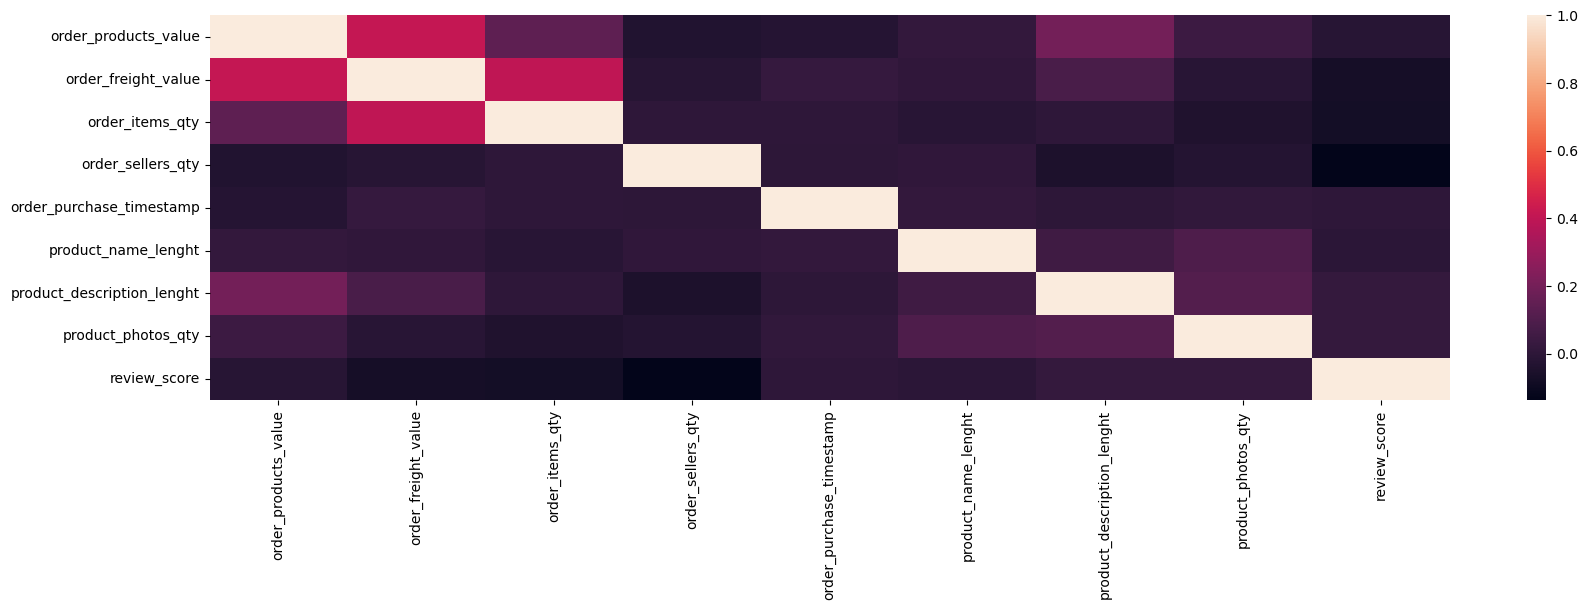

In [24]:
plt.figure(figsize=(20,5))
sns.heatmap(corr_matrix)
plt.show()

### Create new features
According to the correlation result, no feature has strong correlation with review score, so we are going to create some new features 